# Comparing pax and XeRawDP

Amaro, de Perio, and Tunnell, April 2016

This tutorial shows you how to compare XeRawDP and pax output.

The following line just runs our standard code for every analysis.  You can change 'run' to 'load' to see what is in there.

In [5]:
%matplotlib inline
%run boiler_plate.py

# The following paths are specific to Midway
hax.init(main_data_paths=['.'])

dataset = 'xe100_120227_1547'

<Describe tool here>  

If we have a CSV file with all the cut values, we can load this in a DataFrame.

In [6]:
print("Loading cut values from", dataset)
df = pd.read_csv('%s.txt' % dataset,
                 sep='\t', index_col=0,)

Loading cut values from xe100_120227_1547


We can see roughly what this contains by looking at the first few values.

In [7]:
df.head()

,Xsignalnoise_comb,Xentropy0,Xs1width0,Xs2top0,Xs2peaks2,Xs1coin2,Xhighlog1,Xs2single3,Xs1single4,Xveto2,...,Xlownoise0_m,Xn3sigma,Xs2peakpos0,Xtime_diff_50,X34kg2,Xs1single5,X34kg,X48kg0,Xs1coin0,XDM
event number,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,0
1,0,1,1,1,1,1,1,0,1,0,...,0,0,1,0,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,0,...,1,0,1,0,0,1,0,1,1,0
3,0,1,1,1,1,1,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,1,0,1,1,0,1,1,1,1,0,...,1,0,0,0,0,1,0,0,1,0


The following line then combines the normal pax output with these cut values.

In [8]:
print("Loading pax data from", dataset)
df = df.join(hax.minitrees.load(dataset))

Loading pax data from xe100_120227_1547
Found minitree at ./xe100_120227_1547_Basics.root


In [9]:
df.head()

,Xsignalnoise_comb,Xentropy0,Xs1width0,Xs2top0,Xs2peaks2,Xs1coin2,Xhighlog1,Xs2single3,Xs1single4,Xveto2,...,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z
event number,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,859.932861,0,0.000000,1072.108887,0.136132,310414.031250,0.350019,11.892453,4.171698,-19.909113
1,0,1,1,1,1,1,1,0,1,0,...,24153.117188,0,9.100586,927.390076,0.111803,226750.453125,0.377256,11.643396,6.662264,-16.910862
2,1,1,1,1,1,1,1,1,1,0,...,151.566666,0,25.892330,1444.435791,0.064499,191977.531250,0.421577,9.650944,-3.673585,-28.745581
3,0,1,1,1,1,1,1,0,1,0,...,15262.319336,0,10.205989,1007.872742,0.077767,133552.000000,0.455015,11.892453,-0.435849,-27.439680
4,1,0,1,1,0,1,1,1,1,0,...,22.093863,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now you can play with both.  For example:

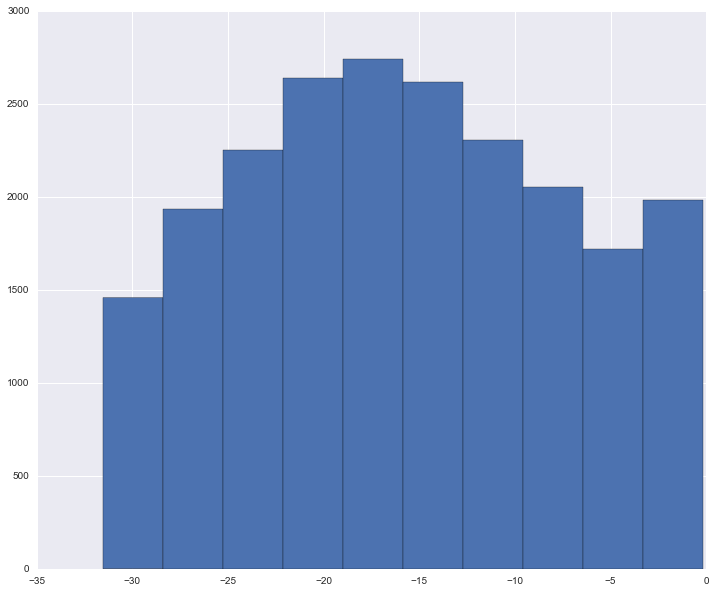

In [14]:
df[df['Xsignalnoise_comb'] == 1]['z'].hist()